In [5]:
!pip install tensorflow-datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------  5.2/5.3 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 8.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21544 sha256=229cce0fd87e11f91473af626a32529bdf595c897c586ba59152946158a3cc1f
  Stored in directory: c:\users\rcish\appdata\local\pip\cache\wheels\e7\e6\28\864bdfee5339dbd6ddcb5a186286a8e217648ec198bdf0097d
Successfully built promise


In [10]:
import tensorflow_datasets as tfds

ds, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)
print(info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='C:\\Users\\rcish\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemo

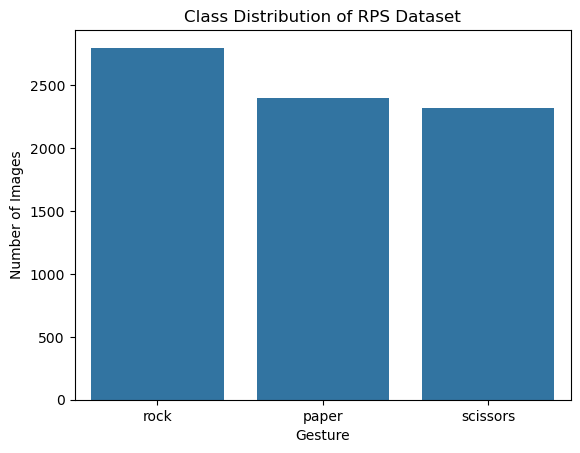

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = {'rock': 2800, 'paper': 2400, 'scissors': 2321}  # Replace with actual path-based counting
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title('Class Distribution of RPS Dataset')
plt.xlabel('Gesture')
plt.ylabel('Number of Images')
plt.show()

In [16]:
class_names = info.features['label'].names

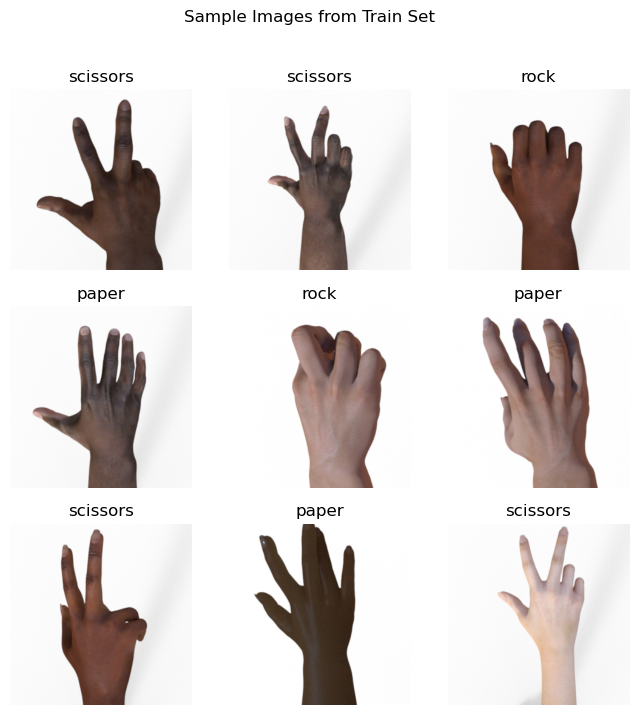

In [18]:
import matplotlib.pyplot as plt

class_names = info.features['label'].names  # Access class names from dataset info

plt.figure(figsize=(8, 8))
for i, (img, label) in enumerate(ds['train'].take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img.numpy())
    plt.title(class_names[label.numpy()])
    plt.axis('off')
plt.suptitle('Sample Images from Train Set')
plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

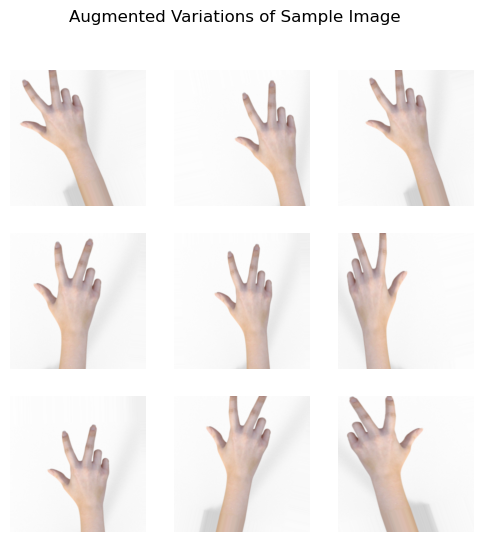

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Assume `img` is one image from the dataset
datagen = ImageDataGenerator(
    rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.15, horizontal_flip=True, fill_mode='nearest')

# Expand dimensions to match (1, height, width, channels)
sample_img = img.numpy()[None]

# Plot 9 augmented versions
plt.figure(figsize=(6, 6))
for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    if i == 8:
        break
plt.suptitle("Augmented Variations of Sample Image")
plt.show()